In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv(r"D:\DAI 101\ulalala\suv_data.csv")

In [16]:
# Data preprocessing
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.85
Precision: 0.9393939393939394
Recall: 0.6595744680851063
F1-Score: 0.775
ROC-AUC: 0.9580297289419994


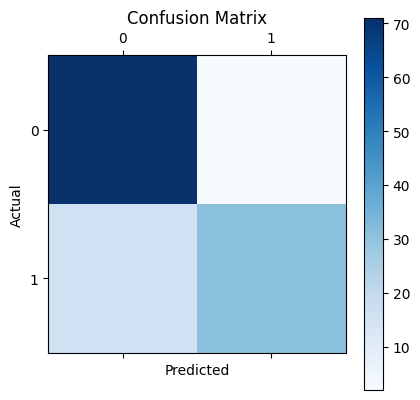

In [18]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(conf_matrix, cmap="Blues")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

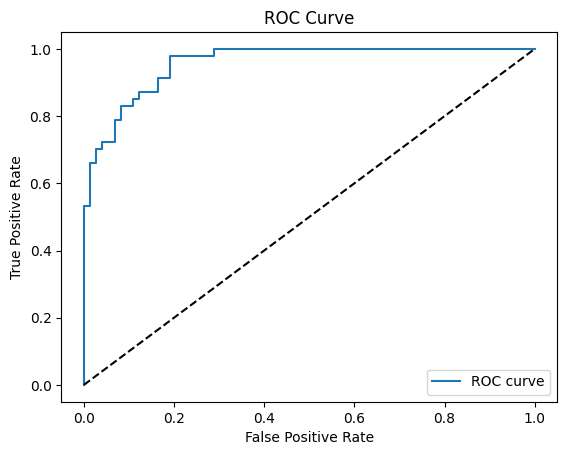

In [19]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

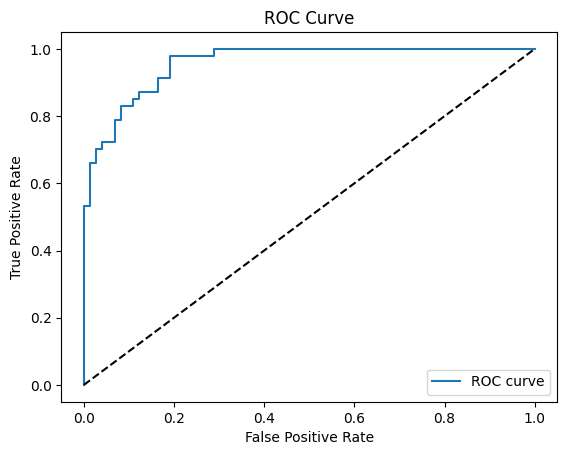

In [20]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

In [21]:

# Hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model after tuning
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_best_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluation of the tuned model
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Tuned Model Precision:", precision_score(y_test, y_pred_best))
print("Tuned Model Recall:", recall_score(y_test, y_pred_best))
print("Tuned Model F1-Score:", f1_score(y_test, y_pred_best))
print("Tuned Model ROC-AUC:", roc_auc_score(y_test, y_pred_best_proba))


Tuned Model Accuracy: 0.85
Tuned Model Precision: 0.9393939393939394
Tuned Model Recall: 0.6595744680851063
Tuned Model F1-Score: 0.775
Tuned Model ROC-AUC: 0.9580297289419994
